## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [7]:
print("Mean:")
print(df.mean())
print("\nVariance:")
df.var()

Mean:
AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

Variance:


AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

In [8]:
import matplotlib.pyplot as plt

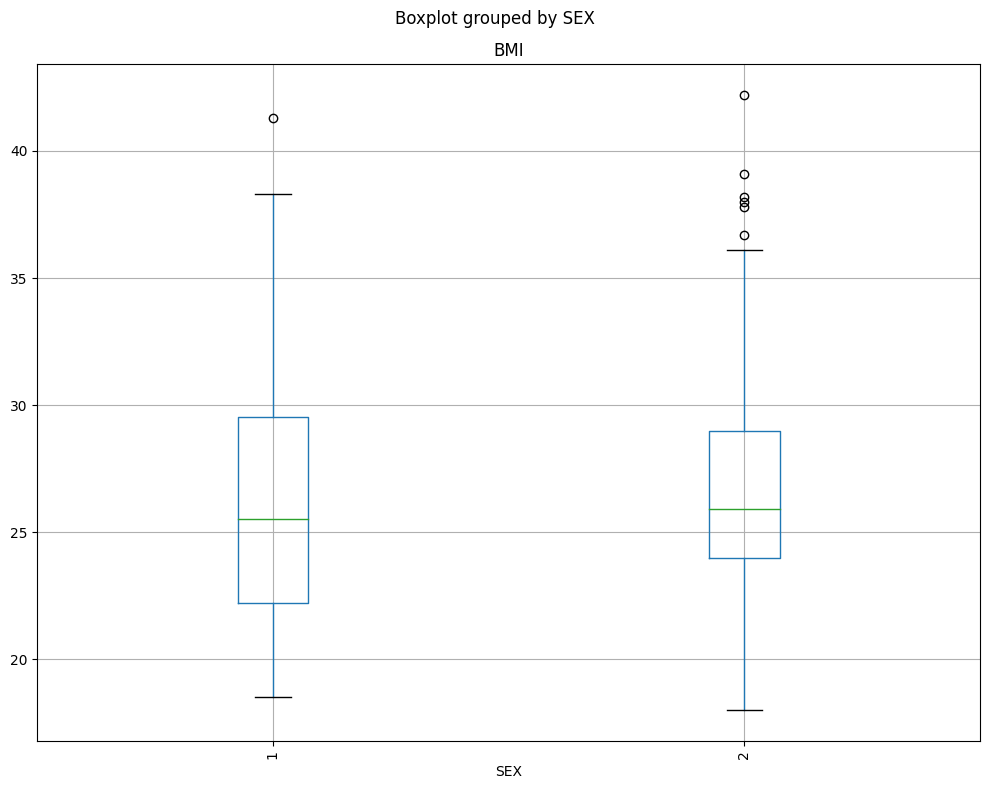

In [9]:
df.boxplot(column='BMI', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

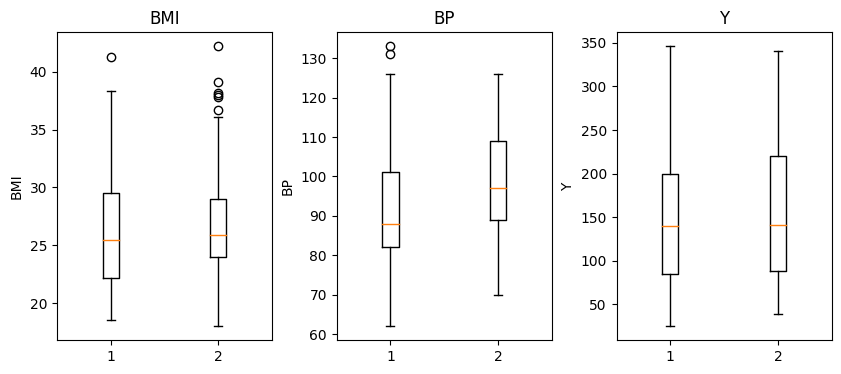

In [15]:
# Select the columns with the data to plot
data_columns = ['BMI', 'BP', 'Y']
group_columns = ['SEX']

# Create a list of the labels for each data column
labels = data_columns

# Group the data by "SEX"
grouped = df.groupby(group_columns)

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Loop through each axis and create a boxplot for each data column in each subgroup
for i, ax in enumerate(axes.flatten()):
    # Get the data for the current subgroup and data column
    data = [grouped.get_group(g)[data_columns[i % 3]] for g in grouped.groups.keys()]
    
    # Create the boxplot
    ax.boxplot(data)
    
    # Set the title and y-axis label
    ax.set_title(data_columns[i % 3])
    ax.set_ylabel(labels[i % 3])
    
    # Set the x-axis tick labels
    ax.set_xticklabels(grouped.groups.keys())
    
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot on the screen
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

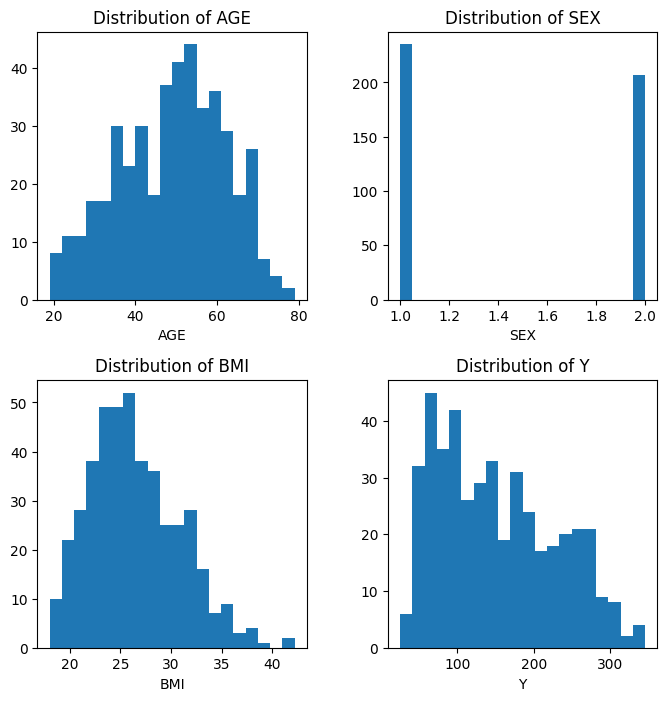

In [17]:

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Loop through each axis and create a histogram for each variable
for i, ax in enumerate(axes.flatten()):
    # Get the name of the current variable
    variable = ["AGE", "SEX", "BMI", "Y"][i]
    
    # Create the histogram
    ax.hist(df[variable], bins=20)
    
    # Set the title and x-axis label
    ax.set_title("Distribution of {}".format(variable))
    ax.set_xlabel(variable)
    
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot on the screen
plt.show()


### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women